<a href="https://www.kaggle.com/code/kazuhiramiller/aussiehousepricesanalysis?scriptVersionId=115118159" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Importing the Libraries Needed for EDA and Data Wrangling/Cleaning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importing the DataSet

In [2]:
df = pd.read_csv("/kaggle/input/australian-housing-data-1000-properties-sampled/RealEstateAU_1000_Samples.csv")
df

,index,TID,breadcrumb,category_name,property_type,building_size,land_size,preferred_size,open_date,listing_agency,...,state,zip_code,phone,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added 2 hours ago,Professionals - DARWIN CITY,...,NT,800,08 8941 8289,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
1,1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,171m²,NaN,171m²,Added 7 hours ago,Nick Mousellis Real Estate - Eview Group Member,...,NT,800,0411724000,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
2,2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,NaN,Added 22 hours ago,Habitat Real Estate - THE GARDENS,...,NT,800,08 8981 0080,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
3,3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added yesterday,Ray White - NIGHTCLIFF,...,NT,800,08 8982 2403,NaN,NaN,premiere,1.0,1.0,0.0,2022-05-27 15:54:05
4,4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,201m²,NaN,201m²,Added yesterday,Carol Need Real Estate - Fannie Bay,...,NT,800,0418885966,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1351983,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,NaN,9.17ha,9.17ha,Under offer,United Realty NT - Parap,...,NT,834,08 8981 2666,NaN,NaN,feature,4.0,3.0,6.0,2022-05-27 15:54:05
996,996,1351984,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,203m²,600m²,600m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.0,2.0,2.0,2022-05-27 15:54:05
997,997,1351985,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,209.6m²,800m²,800m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.0,2.0,2.0,2022-05-27 15:54:05
998,998,1351986,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,180m²,450m²,450m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,810,08 89834326,NaN,NaN,standard,4.0,2.0,3.0,2022-05-27 15:54:05


Let's First Check all the Columns contained in the DataFrame.

In [3]:
df.columns

Index(['index', 'TID', 'breadcrumb', 'category_name', 'property_type',
       'building_size', 'land_size', 'preferred_size', 'open_date',
       'listing_agency', 'price', 'location_number', 'location_type',
       'location_name', 'address', 'address_1', 'city', 'state', 'zip_code',
       'phone', 'latitude', 'longitude', 'product_depth', 'bedroom_count',
       'bathroom_count', 'parking_count', 'RunDate'],
      dtype='object')

We can Cearly see that we won't need some of the Columns, so let's just drop them.

In [4]:
df.drop(["index", "TID", "breadcrumb", "open_date", "phone", "RunDate"], axis = 1, inplace = True)

Let's Check our DataFrame Again

In [5]:
df.head()

,category_name,property_type,building_size,land_size,preferred_size,listing_agency,price,location_number,location_type,location_name,...,address_1,city,state,zip_code,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count
0,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Professionals - DARWIN CITY,"$435,000",139468611,Buy,"$435,000",...,44 Woods Street,Darwin City,NT,800,NaN,NaN,premiere,2.0,1.0,1.0
1,Real Estate & Property for sale in DARWIN CITY...,Apartment,171m²,NaN,171m²,Nick Mousellis Real Estate - Eview Group Member,"Offers Over $320,000",139463755,Buy,"Offers Over $320,000",...,14/14 Dashwood Place,Darwin City,NT,800,NaN,NaN,premiere,3.0,2.0,2.0
2,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,NaN,Habitat Real Estate - THE GARDENS,"$310,000",139462495,Buy,"$310,000",...,13/86 Woods Street,Darwin City,NT,800,NaN,NaN,premiere,2.0,1.0,1.0
3,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Ray White - NIGHTCLIFF,"$259,000",139451679,Buy,"$259,000",...,1309/43B Knuckey Street,Darwin City,NT,800,NaN,NaN,premiere,1.0,1.0,0.0
4,Real Estate & Property for sale in DARWIN CITY...,Unit,201m²,NaN,201m²,Carol Need Real Estate - Fannie Bay,"$439,000",139433803,Buy,"$439,000",...,3/10 McLachlan Street,Darwin City,NT,800,NaN,NaN,premiere,3.0,2.0,2.0


Now, let's see how many Null Values we have got and how we can handle Them

In [6]:
null = df.isnull().sum()
null

category_name         0
property_type         0
building_size       720
land_size           467
preferred_size      391
listing_agency        0
price                 0
location_number       0
location_type         0
location_name         0
address              12
address_1            12
city                  0
state                 0
zip_code              0
latitude           1000
longitude          1000
product_depth         0
bedroom_count        33
bathroom_count       33
parking_count        33
dtype: int64

Let's Create an Heatmap to see how these Null Values are distributed

<AxesSubplot:>

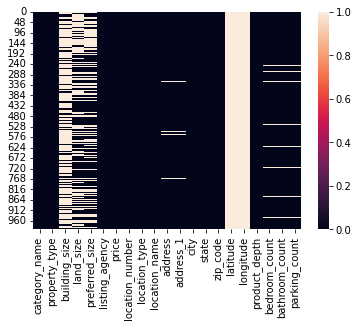

In [7]:
sns.heatmap(df.isnull())

The "Building Size", "Land Size" and "Preferred Size" are sadly columns to drop, since there are too many missing values.

Alternatively, we could create a new DataFrame to be analyzed with Only the Rows that are not Null for the 3 Columns mentioned, but that would reduce the size of our samples, which is already small.

In [8]:
df.drop(["preferred_size", "building_size", "land_size"], axis = 1, inplace = True)

<AxesSubplot:>

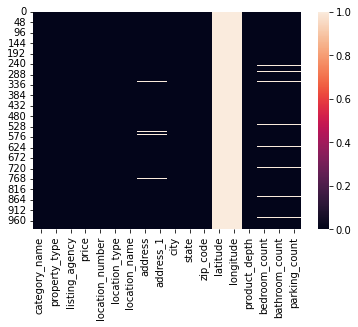

In [9]:
sns.heatmap(df.isnull())

Now, we See in the Columns that we have no Latitude and Longitude Data, so we are going to drop them.

<AxesSubplot:>

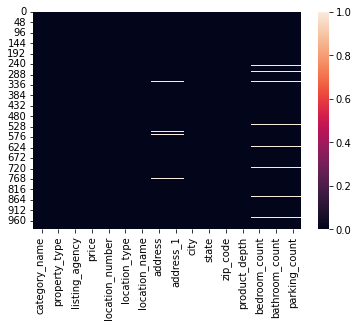

In [10]:
df.drop(["longitude", "latitude"], axis = 1, inplace = True)
sns.heatmap(df.isnull())

Now, some of the Columns won't be used probably, but we decide to leave them there, just in case.

We also notice that the count for bedrooms, bathrooms and parking are missing into the same Rows.

We have got 2 main ways to approach this:

1) Remove the Rows with the missing values

2) Replace the Missing Values

Since the Missing Value Rows are just 33 out of 1000, that represent a 3.3% of the total DataFrame Size, so it won't really mess that much with the DataSet integrity.

That being said, we decide to go ahead and replace missing value with the mode, which is the most occurring value in a column, since it's the Null Filling/Replacement technique that makes the most sense.

In [11]:
df["bedroom_count"].fillna(df["bedroom_count"].mode()[0], inplace = True)
df["bathroom_count"].fillna(df["bedroom_count"].mode()[0], inplace = True)
df["parking_count"].fillna(df["bedroom_count"].mode()[0], inplace = True)

<AxesSubplot:>

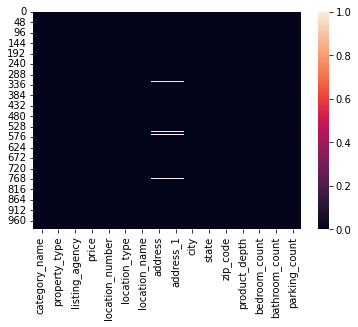

In [12]:
sns.heatmap(df.isnull())

Now, let's have a look to our Data and do some EDA

In [13]:
df["category_name"].value_counts()

Real Estate & Property for sale in DARWIN, NT 0801         816
Real Estate & Property for sale in DARWIN CITY, NT 0800    184
Name: category_name, dtype: int64

In [14]:
df["property_type"].value_counts()

House                   441
Unit                    230
Apartment               212
Townhouse                38
Residential Land         33
Duplex/Semi-detached     19
Acreage                   9
Block Of Units            6
Other                     4
Villa                     4
Studio                    2
Warehouse                 1
Lifestyle                 1
Name: property_type, dtype: int64

In [15]:
df["listing_agency"].value_counts()

Real Estate Central - DARWIN CITY                  113
Elders Real Estate - Darwin                         62
Elders Real Estate - Palmerston                     53
Raine & Horne - Darwin                              48
First National Real Estate O'Donoghues - Darwin     41
                                                  ... 
Ellis Parker Real Estate - LARRAKEYAH                1
Dunvegan Real Estate - PALMERSTON                    1
Australian Home Partners                             1
buymyplace                                           1
Mercury Real Estate                                  1
Name: listing_agency, Length: 85, dtype: int64

In [16]:
df["city"].value_counts()

Darwin City         285
Stuart Park          39
Rosebery             37
Bakewell             31
Durack               30
Zuccoli              29
Woodroffe            27
Nightcliff           27
Driver               26
Parap                26
Rapid Creek          25
Bellamack            23
Humpty Doo           20
Johnston             20
Leanyer              19
Gunn                 19
Gray                 19
Karama               16
Moulden              15
Howard Springs       15
Berrimah             15
Bayview              14
Fannie Bay           14
Farrar               12
Coconut Grove        12
Muirhead             12
The Gardens          11
Lyons                10
Millner              10
Woolner               9
Jingili               9
Herbert               9
Tiwi                  9
Larrakeyah            9
Ludmilla              7
Alawa                 7
Anula                 7
Wagaman               7
Malak                 7
Wulagi                6
Virginia              6
Brinkin         

<AxesSubplot:ylabel='price'>

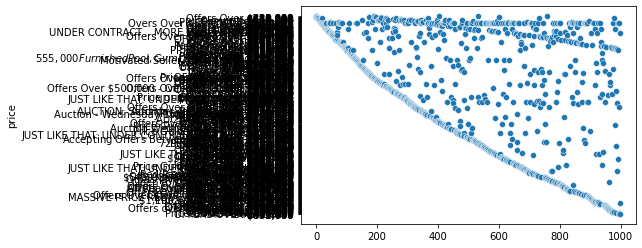

In [17]:
sns.scatterplot(data = df["price"])

Well, feels like we need to clean or reorganize that messy data :D

As we can See, not every price is a continuous Value, with some prices being more like a categorical variable.

So, from now on we will work around that to gather all the numerical prices only from the "price" Column, ignoring every other "Categorical Value".

In [18]:
import re

def extract_price(x):
    if x != "":

        match = re.search(r'\$?\s*(\d+(?:\.\d+)?)[k|m|K|M]\s*', x)
        
        if match:
            price = match.group(1)
            price = float(price)
            if x[-1].lower() == 'k':
                price *= 1000
            elif x[-1].lower() == 'm':
                price *= 1000000
            return int(price)
        else:
            match = re.sub(r'[^\d]', '', x)
            
            try:
                return int(match)
            except:
                try:
                    return(float(match))
                except:
                    return  None
            
                
df["NumericalPrice"] = df["price"]

df["NumericalPrice"] = df["NumericalPrice"].apply(lambda x: extract_price(x))

In [19]:
'''
import re

# Define a function that extracts the price information from a string
def extract_price(x):
    if x != "":
        # Use a regular expression to match the pattern of the string
        #r'\$?(\d+(?:\.\d+)?)
        #match = re.search(r'\$?\s*(\d+(?:\.\d+)?)[k|K]\s*', x)
        
        match = re.search(r'\$?\s*(\d+(?:\.\d+)?)[k|m|K|M]\s*', x)
        if match:
            # Extract the numeric part of the string
            price = match.group(1)
            # Convert the string to a float
            price = float(price)
            # Multiply the price by 1000 if the suffix is "k" or by 1000000 if the suffix is "m"
            if x[-1].lower() == 'k':
                price *= 1000
            elif x[-1].lower() == 'm':
                price *= 1000000
            return int(price)
        else:
            # Use a regular expression to match any characters that are not digits
            match = re.sub(r'[^\d]', '', x)
            #match = re.sub(r'\.\d+', '', x)
            
            try:
                return int(match)
            except:
                try:
                    return(float(match))
                except:
                    return  None
            
                
df["NumericalPrice"] = df["price"]

#df["NumericalPrice"] = df["NumericalPrice"].apply(lambda x: re.sub(r'[^\d]', '', x))

df["NumericalPrice"] = df["NumericalPrice"].apply(lambda x: extract_price(x))

#df["NumericalPrice"] = df["NumericalPrice"].apply(lambda x: re.sub(r'[^\d.]', '', x))
'''

'\nimport re\n\n# Define a function that extracts the price information from a string\ndef extract_price(x):\n    if x != "":\n        # Use a regular expression to match the pattern of the string\n        #r\'\\$?(\\d+(?:\\.\\d+)?)\n        #match = re.search(r\'\\$?\\s*(\\d+(?:\\.\\d+)?)[k|K]\\s*\', x)\n        \n        match = re.search(r\'\\$?\\s*(\\d+(?:\\.\\d+)?)[k|m|K|M]\\s*\', x)\n        if match:\n            # Extract the numeric part of the string\n            price = match.group(1)\n            # Convert the string to a float\n            price = float(price)\n            # Multiply the price by 1000 if the suffix is "k" or by 1000000 if the suffix is "m"\n            if x[-1].lower() == \'k\':\n                price *= 1000\n            elif x[-1].lower() == \'m\':\n                price *= 1000000\n            return int(price)\n        else:\n            # Use a regular expression to match any characters that are not digits\n            match = re.sub(r\'[^\\d]\', \'\'

In [20]:
pd.options.display.max_columns =  None
pd.options.display.max_rows = None

df[["price", "NumericalPrice"]]

,price,NumericalPrice
0,"$435,000",4.350000e+05
1,"Offers Over $320,000",3.200000e+05
2,"$310,000",3.100000e+05
3,"$259,000",2.590000e+05
4,"$439,000",4.390000e+05
5,"$825,000",8.250000e+05
6,"$820,000",8.200000e+05
7,$369 000,3.690000e+05
8,"$439,000",4.390000e+05
9,"$455,000",4.550000e+05


In [21]:
c = 0

for x in df["NumericalPrice"]:
    x = str(x)

    if len(x) <= 5:
        x = None

    elif len(x) >= 8:
        count0 = 0

        for n in x:
            if n == "0":
                count0 += 1
        
        if count0 <= 2:
            x = None

        else:
            x = x[0:6]

    df["NumericalPrice"][c] = x
    
    c += 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
df[["price", "NumericalPrice"]]

,price,NumericalPrice
0,"$435,000",435000.0
1,"Offers Over $320,000",320000.0
2,"$310,000",310000.0
3,"$259,000",259000.0
4,"$439,000",439000.0
5,"$825,000",825000.0
6,"$820,000",820000.0
7,$369 000,369000.0
8,"$439,000",439000.0
9,"$455,000",455000.0


<AxesSubplot:>

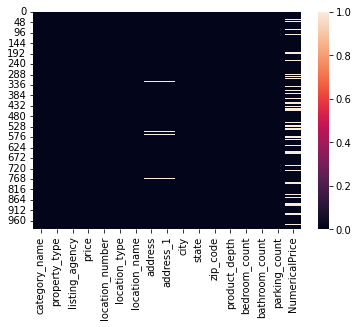

In [23]:
sns.heatmap(df.isnull())

In [24]:
df.dropna(axis = 0, how = "any", inplace = True)

<AxesSubplot:>

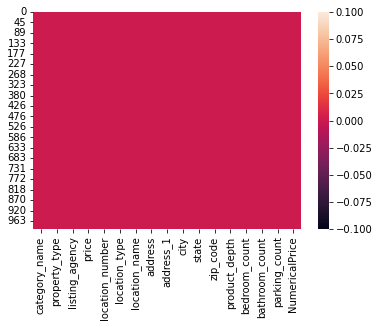

In [25]:
sns.heatmap(df.isnull())

In [26]:
df["NumericalPrice"]

0      435000.0
1      320000.0
2      310000.0
3      259000.0
4      439000.0
5      825000.0
6      820000.0
7      369000.0
8      439000.0
9      455000.0
10     280000.0
12     439000.0
13     775000.0
14     625000.0
15     599000.0
16     490000.0
17     337500.0
19     439000.0
21     440000.0
22     640000.0
23     500000.0
24     305000.0
25     295000.0
26     795000.0
27     950000.0
28     485000.0
29     250000.0
30     549000.0
31     299000.0
32     395000.0
34     475000.0
37     465000.0
38     600000.0
39     980000.0
40     105000.0
42     450000.0
43     749000.0
45     289000.0
46     490000.0
48     565000.0
49     399000.0
50     469000.0
51     649000.0
52     499000.0
53     400000.0
54     800000.0
56     299000.0
57     580000.0
58     375000.0
59     489000.0
60     195000.0
61     505000.0
62     325000.0
63     539000.0
64     180000.0
66     145000.0
67     215000.0
68     450000.0
69     865000.0
70     400000.0
71     369000.0
72     350000.0
73     5

Ok, now that we have Cleaned our Data, let's move on with our Project.

In [27]:
df["NumericalPrice"].astype("float")

0      435000.0
1      320000.0
2      310000.0
3      259000.0
4      439000.0
5      825000.0
6      820000.0
7      369000.0
8      439000.0
9      455000.0
10     280000.0
12     439000.0
13     775000.0
14     625000.0
15     599000.0
16     490000.0
17     337500.0
19     439000.0
21     440000.0
22     640000.0
23     500000.0
24     305000.0
25     295000.0
26     795000.0
27     950000.0
28     485000.0
29     250000.0
30     549000.0
31     299000.0
32     395000.0
34     475000.0
37     465000.0
38     600000.0
39     980000.0
40     105000.0
42     450000.0
43     749000.0
45     289000.0
46     490000.0
48     565000.0
49     399000.0
50     469000.0
51     649000.0
52     499000.0
53     400000.0
54     800000.0
56     299000.0
57     580000.0
58     375000.0
59     489000.0
60     195000.0
61     505000.0
62     325000.0
63     539000.0
64     180000.0
66     145000.0
67     215000.0
68     450000.0
69     865000.0
70     400000.0
71     369000.0
72     350000.0
73     5

Ok, Now, Let's finsh our EDA and build the Final Model.

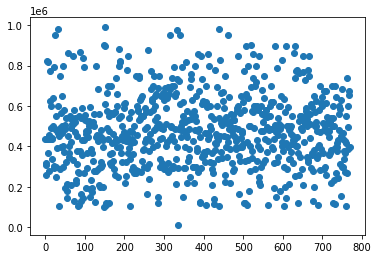

In [28]:
plt.scatter(x = [i for i in range(len(df))], y = df["NumericalPrice"].astype("float"))

As we can see, Our Price Data is not Linearly Distributed, however, we'll Try to Firstly Build a Model with a Linear Regression.

<AxesSubplot:xlabel='NumericalPrice', ylabel='Count'>

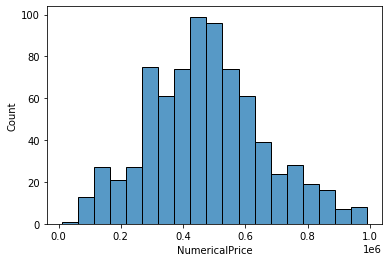

In [29]:
sns.histplot(df["NumericalPrice"].astype("float"))

In [30]:
df["NumericalPrice"] = df["NumericalPrice"].astype("float")

In [31]:
df.columns

Index(['category_name', 'property_type', 'listing_agency', 'price',
       'location_number', 'location_type', 'location_name', 'address',
       'address_1', 'city', 'state', 'zip_code', 'product_depth',
       'bedroom_count', 'bathroom_count', 'parking_count', 'NumericalPrice'],
      dtype='object')

Let's now Build a New DataFrame, containing all the Columns that we will use for our Machine Learning.

In [32]:
newdf = df[["property_type", "zip_code", "bedroom_count", "bathroom_count", "parking_count","NumericalPrice"]]

Let's Check for some Correlations

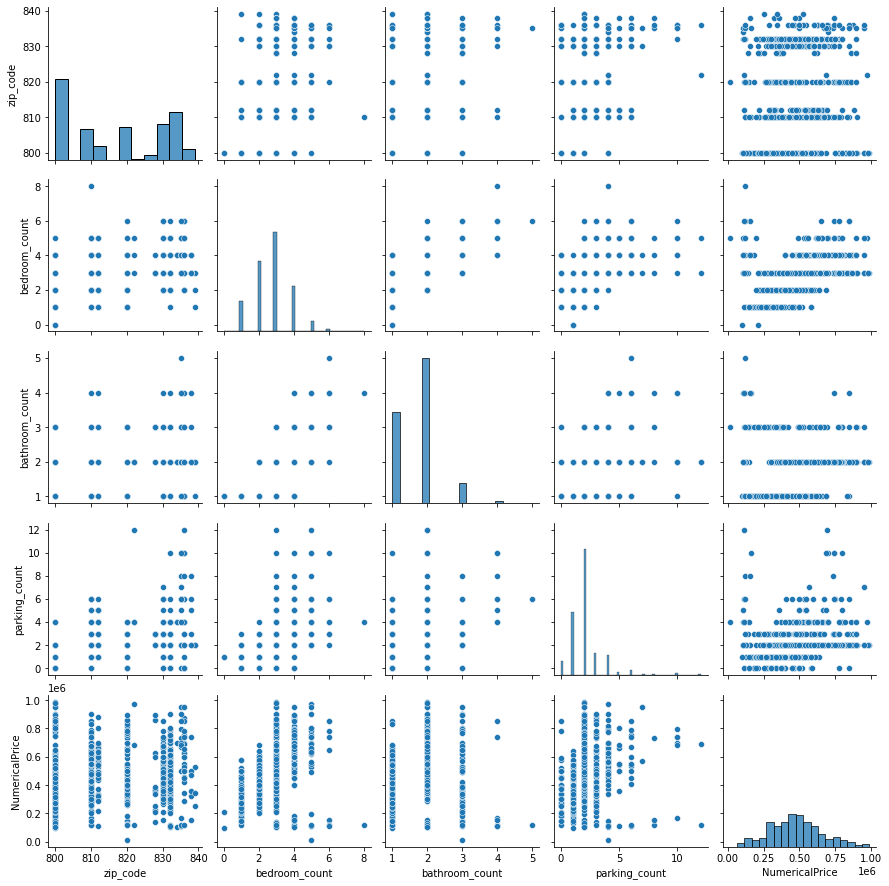

In [33]:
sns.pairplot(data = newdf)

Let's Create some Dummy Variables.

In [34]:
newdf = pd.get_dummies(newdf)

In [35]:
newdf.head()

,zip_code,bedroom_count,bathroom_count,parking_count,NumericalPrice,property_type_Acreage,property_type_Apartment,property_type_Block Of Units,property_type_Duplex/Semi-detached,property_type_House,property_type_Other,property_type_Residential Land,property_type_Studio,property_type_Townhouse,property_type_Unit,property_type_Villa
0,800,2.0,1.0,1.0,435000.0,0,0,0,0,1,0,0,0,0,0,0
1,800,3.0,2.0,2.0,320000.0,0,1,0,0,0,0,0,0,0,0,0
2,800,2.0,1.0,1.0,310000.0,0,0,0,0,0,0,0,0,0,1,0
3,800,1.0,1.0,0.0,259000.0,0,0,0,0,1,0,0,0,0,0,0
4,800,3.0,2.0,2.0,439000.0,0,0,0,0,0,0,0,0,0,1,0


Now that we Have Cleaned and Prepared our Data, let's move on with Modeling.


The Steps for Building Our Linear Regression Model Are:

- Create the X Features Variable and Y the Predicted Variable
- Split the DataSet into a TrainSet and a TestSet
- Fit the Model
- Use the Model to make Predictions
- Calculate Errors 
- Evaluate the Model

In [36]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as TTS

In [37]:
x = newdf.drop("NumericalPrice", axis = 1, inplace= False)
y = newdf["NumericalPrice"]

In [38]:
xTrain, xTest, yTrain, yTest = TTS(x, y, test_size = 0.3)

In [39]:
LR_ = LR()

In [40]:
LR_.fit(xTrain, yTrain)

LinearRegression()

In [41]:
preds = LR_.predict(xTest)

In [42]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

In [43]:
mae = MAE(preds, yTest)
mse = MSE(preds, yTest)
rmse = MSE(preds, yTest, squared= False)
r2 = R2(preds, yTest)

In [44]:
print(mae)
print(mse)
print(rmse)
print(r2)

109072.1537758192
25133039454.05762
158534.03247901576
-1.1835998141164925


As we've Guessed Earlier, by Looking at the Errors, we can conclude that the Linear Regression is not the best Model to fit our Data.
Since we have Non-Linear Data, but we Still need to Address a Regression Problem, we will Try out 2 more Models:

- K Nearest Neighbors Regressor
- Decision Tree Regressor

The Steps for Building Our Models are pretty much the same with some Variations:
    
- Create the X Features Variable and Y the Predicted Variable
- Split the DataSet into a TrainSet and a TestSet
- Search for the Best Parameters with the GridSearchCV Method
- Fit the Model
- Use the Model to make Predictions
- Calculate Errors 
- Cross Validate the Model
- Evaluate the Model

In [45]:
#We Resize the Unit of Our Prices for Convenience Purposes

newdf["RoundedPrice"] = newdf["NumericalPrice"].apply(lambda x: x/100000)

In [46]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import GridSearchCV as GSCV

x = newdf.drop("RoundedPrice", axis = 1, inplace= False)
y = newdf["RoundedPrice"]
xTrain, xTest, yTrain, yTest = TTS(x, y, test_size = 0.3)

In [47]:
'''
#Evaluate KNN Neighbors with Elbow Method

Scores = []

for k in range(1, 11):
    K = KNR(algorithm = "auto", n_neighbors = k, p = 1)
    K.fit(xTrain, yTrain)
    Preds = K.predict(xTest)
    Scores.append(MSE(yTest, Preds, squared = False))
    
print(Scores)

plt.plot(Scores)
'''

'\n#Evaluate KNN Neighbors with Elbow Method\n\nScores = []\n\nfor k in range(1, 11):\n    K = KNR(algorithm = "auto", n_neighbors = k, p = 1)\n    K.fit(xTrain, yTrain)\n    Preds = K.predict(xTest)\n    Scores.append(MSE(yTest, Preds, squared = False))\n    \nprint(Scores)\n\nplt.plot(Scores)\n'

In [48]:
Parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNR()

KNN_CV = GSCV(KNN, Parameters, cv = 10)
KNN_CV.fit(xTrain, yTrain)
KNN_CV.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}

In [49]:
Preds = KNN_CV.predict(xTest)

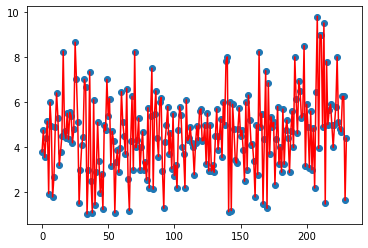

In [50]:
plt.scatter(x = [i for i in range(len(yTest))], y = yTest)
plt.plot(Preds, color = "red")

In [51]:
KNNMAE = MAE(yTest, Preds)
KNNMSE = MSE(yTest, Preds)
KNNRMSE = MSE(yTest, Preds, squared = False)
KNNR2 = R2(yTest, Preds)

In [52]:
Errors = pd.DataFrame(data = [KNNMAE, KNNMSE, KNNRMSE, KNNR2], index = ["MAE", "MSE", "RMSE", "R2"], columns = ["KNR"])

In [53]:
Errors

,KNR
MAE,0.002485
MSE,0.000086
RMSE,0.009249
R2,0.999972


In [54]:
from sklearn.model_selection import cross_val_score as CrossVal

S = CrossVal(KNN_CV, x, y, cv = 10)
S

array([1.        , 0.99991606, 0.99997034, 0.99993879, 0.99733808,
       0.99997504, 0.99998958, 0.99997527, 0.99996503, 0.99995697])

In [55]:
Parameters = {'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt', "log2"],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

Tree = DTR()
TreeCV = GSCV(Tree, Parameters, cv = 10)
TreeCV.fit(xTrain, yTrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [56]:
Preds = TreeCV.predict(xTest)

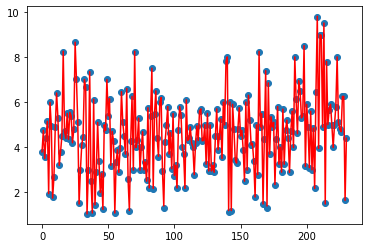

In [57]:
plt.scatter(x = [i for i in range(len(yTest))], y = yTest)
plt.plot(Preds, color = "red")

In [58]:
TreeMAE = MAE(yTest, Preds)
TreeMSE = MSE(yTest, Preds)
TreeRMSE = MSE(yTest, Preds, squared = False)
TreeR2 = R2(yTest, Preds)

In [59]:
Errors["DTR"] = [TreeMAE, TreeMSE, TreeRMSE, TreeR2]
Errors["LinearRegression"] = [mae/100000, mse/100000, rmse/100000, r2]

In [60]:
S = CrossVal(TreeCV, x, y, cv = 10)
S

array([0.99999526, 0.9998215 , 0.99980681, 0.99989174, 0.99699688,
       0.99994171, 0.99995992, 0.99996827, 0.99994059, 0.99990281])

In [61]:
Errors

,KNR,DTR,LinearRegression
MAE,0.002485,0.005914,1.090722
MSE,0.000086,0.000287,251330.394541
RMSE,0.009249,0.016940,1.585340
R2,0.999972,0.999905,-1.183600


As we Can Conclude, Both DecisionTreeRegressor and KNearestNeighborRegressor can fit the Data with Relatively Low Errors. 
Please Mind that Errors for the 2 Models are with Reduced Unit, so, Divided by 100000, to have them with the Same Measuring Unit as the Linear Regression Errors, we Just Need to Multiply them by 100000.